# Zillow Single Family Property Preditor
by Meredith Wang July-27-2022


<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>

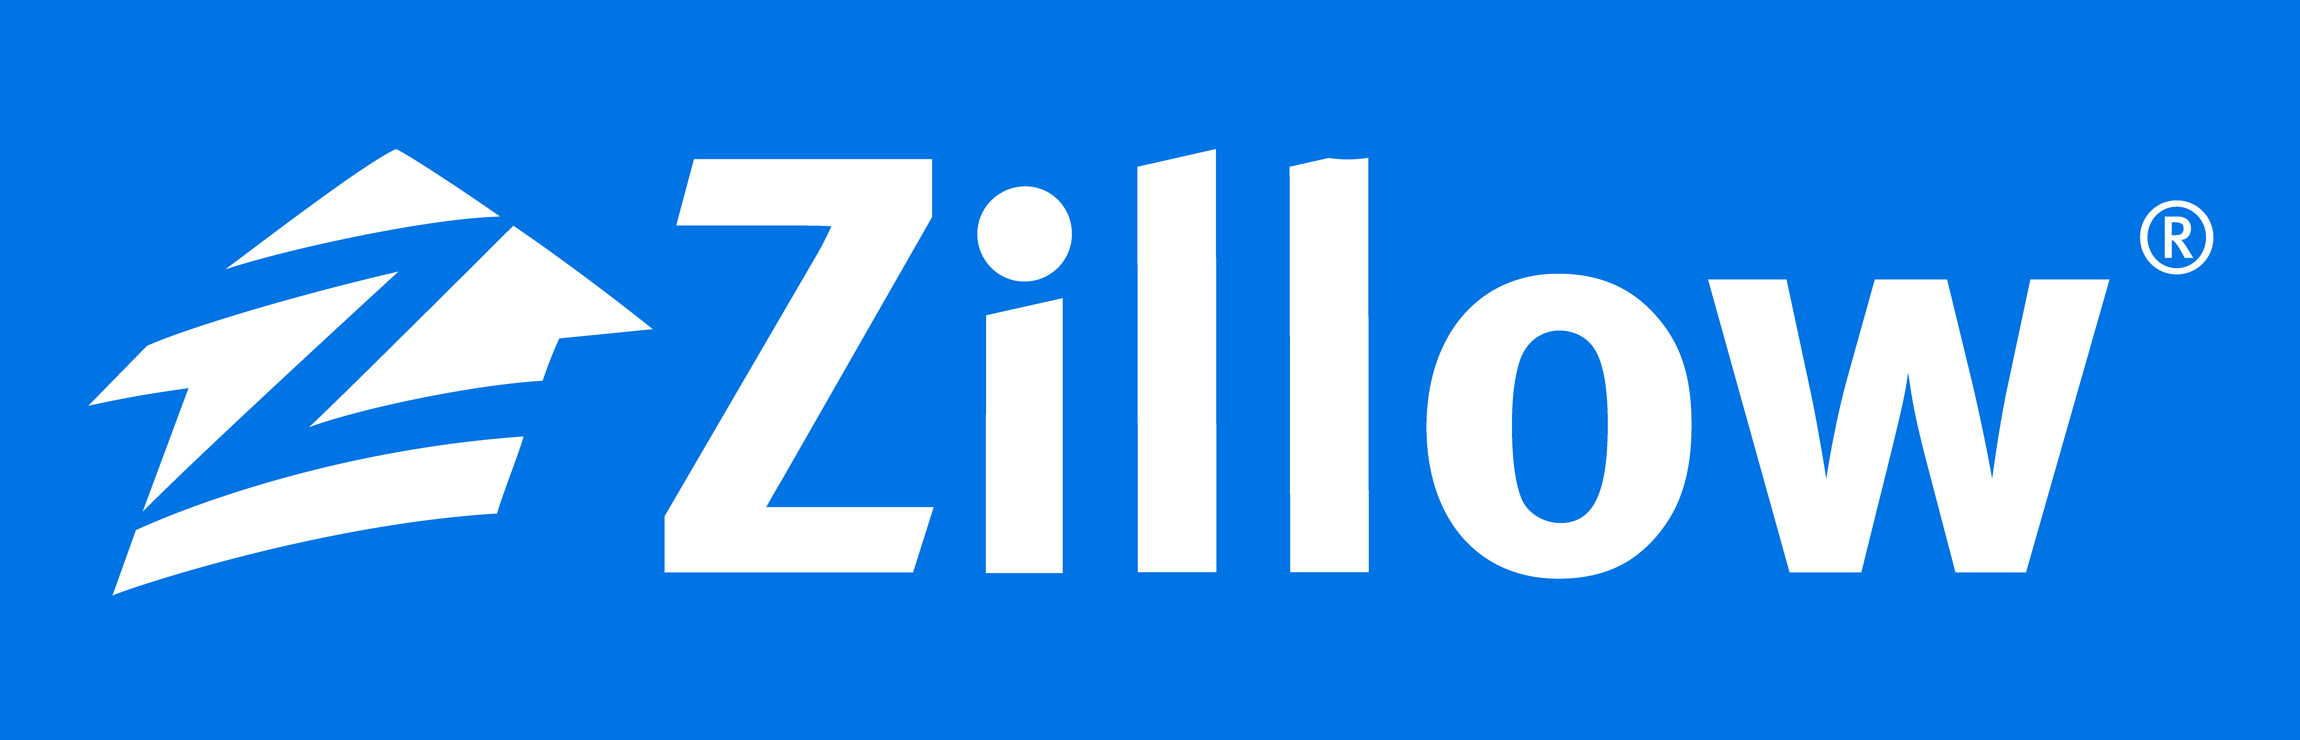

<h1 align="center">------------ 🏘️ Project Goal ------------</h1>

▪️

<h1 align="center">------------ 📃 Project Description ------------</h1>

<h1 align="center">------------ 📝 Initial Questions ------------</h1>

▪️What associated with `assessed_value` the most?

▪️Is having pool positively associated with `assessed value`?

▪️Is number of bedrooms and bathrooms associated with `assessed value`?

▪️Is `assessed_value` significantly different across 3 different counties?

<h1 align="center">------------ 📚 Data Dictionary ------------</h1>

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">Latitude</span> | Float number| Latitude of the middle of the parcel
<span style="background-color: #ffe0bd">Longitude</span> | Float number | Longitude of the middle of the parcel
<span style="background-color: #ffe0bd">Bedrooms</span> | Integer ranging from 1-6 | Number of bedrooms in home
<span style="background-color: #ffe0bd">Bathrooms</span>| Float ranging from 0.5-6.5 | Number of bathrooms in home including fractional bathrooms
<span style="background-color: #ffe0bd">Square Feet</span>| Float number| Calculated total finished living area of the home
<span style="background-color: #ffe0bd">Lot Size</span> | Float number | Area of the lot in square feet
<span style="background-color: #ffe0bd">Age</span> | Integer | This indicate the age of the property in 2017, calculated using the year the principal residence was built
<span style="background-color: #ffe0bd">Assessed Value</span> | Float number | The total tax assessed value of the parcel
<span style="background-color: #ffe0bd">Tax Amount</span> | Float number | The total property tax assessed for that assessment year
<span style="background-color: #ffe0bd">County</span> | 1) Ventura 2) Los Angeles 3) Orange | County in which the property is located
<span style="background-color: #ffe0bd">Bedrooms Size</span> | 1) Small 2) Medium 3) large | Small: 1-2 bedrooms; Medium: 3-4 bedrooms; Large: 5-6 bedrooms
<span style="background-color: #ffe0bd">Bathroom Size</span> | 1) Small 2) Medium 3) large | Small: 1-2 bathrooms; Medium: 3-4 bathrooms; Large: 5-6 bathrooms

<h1 align="center">------------ 🧮 Wrangle Zillow Data ------------</h1>

## 1. Data Acquisition
▪️ Stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

▪️ To acquire the zillow data for singel family properties, I used the **zillow** database in the mySQL server, and joined the following tables to gather data: <samp>`properties_2017, predictions_2017, propertylandusetype`</samp>

▪️ Created **acquire.py** and user-defined function `get_zillow_data()` to acquire and cache data.

In [1]:
# Import essential libraries
from imports import *

# Set up display format
pd.options.display.float_format = '{:,.2f}'.format

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
messy_df = acquire.get_zillow_data()

# Check the shape of our messy dataframe
messy_df.shape

(52441, 11)

## 2. Data Preparation - Data Cleaning 🧹 

▪️ **Missing Values (NaN):**
- Column `has_pool` null values are replaced with 0
    
- All other null values are <span style="color: blue"> **dropped** </span>

- We feel comfortable dropping null values (572 rows) because that's **1.09%** of the entire dataset

▪️ **Data Types:**
- Column `age` is converted **int** datatype

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`
- Created new column `bedrooms_size`, `bathrooms_size` corresponding to `bedrooms`, `bathrooms` value

▪️ **Dummy variables: created dummy variables for binary and non-binary categorical variables**

▪️ **Outliers:**
- Upper bound: <span style="color: blue"> **Q3 + 1.5 * IQR** </span>
- Lower bund: <span style="color: blue"> **Q1 - 1.5 * IQR** </span>
- Each column is adjusted based on distribution


In [2]:
# Cleaning the data using function from prepare.py
df = prepare.prep_zillow(messy_df)

# Checking the shape of our cleaned dataframe
df.shape

(45324, 23)

## 3. Data Preparation - Splitting Data 🗂

In [3]:
# Split the data into train, validate, test using user-defined function from prepare.py
train, validate, test = prepare.split(df)

# Checking the size of each dataset
train.shape, validate.shape, test.shape

((25381, 23), (10878, 23), (9065, 23))

<h1 align="center">------------ 📊 Data Context ------------</h1>

We have data of **47128** single family properties. **5** categorical variables and **7** numerical variables.

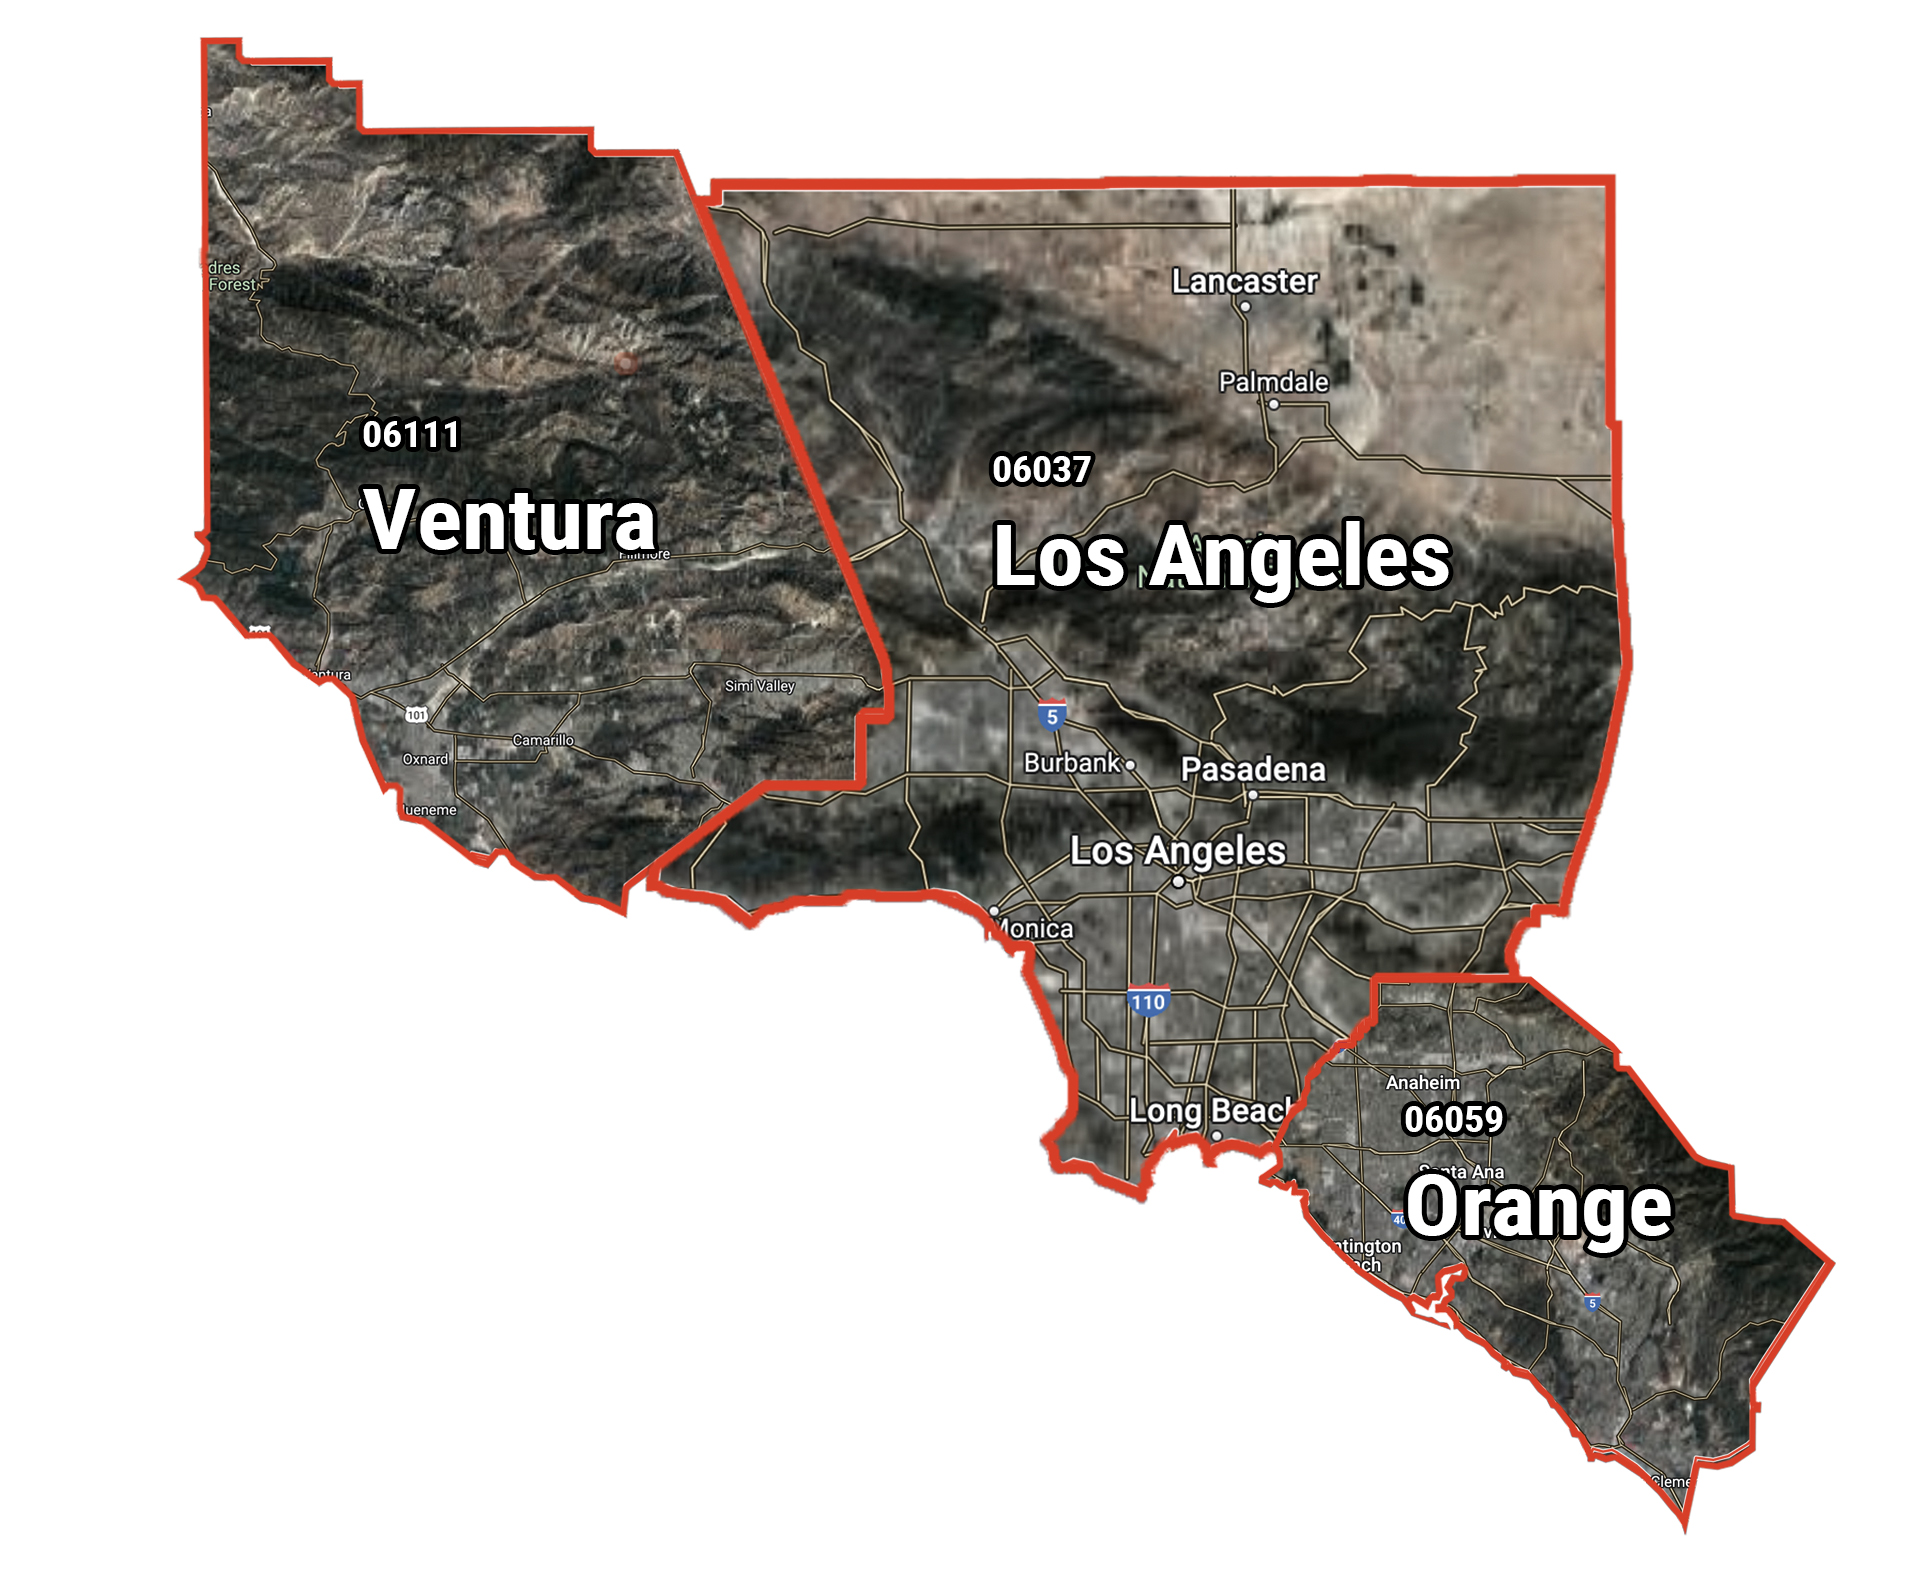

<h1 align="center">------------ 👩🏻‍💻 Exploratory Analysis ------------</h1>

## Question 1. What associated with `assessed_value` the most?

<AxesSubplot:>

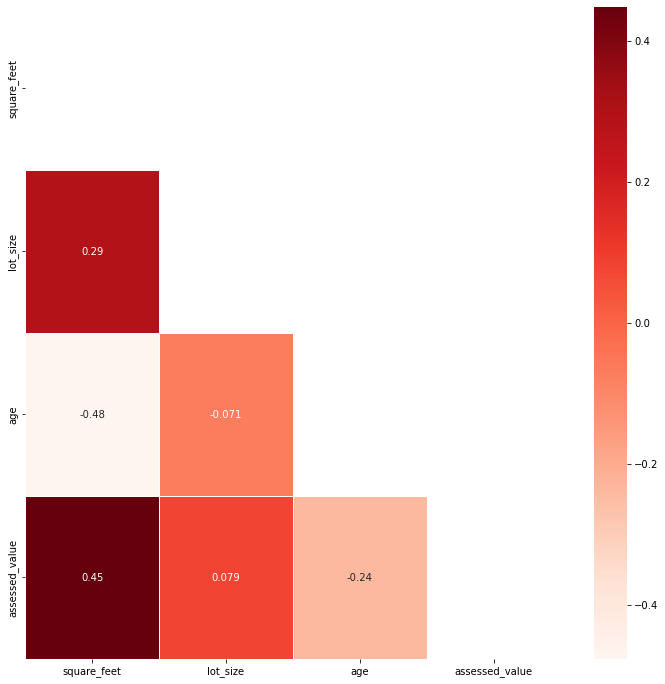

In [4]:
# Input continuous features
continuous_cols = ['square_feet', 'lot_size', 'age', 'assessed_value']

# Calcualte correlation between features
train_corr = train[continuous_cols].corr()

# Visualize correlaiton
plt.figure(figsize = (12,12))
sns.heatmap(train_corr,cmap='Reds', annot=True, linewidth=0.5, mask= np.triu(train_corr))

Text(0.5, 1.0, 'Assessed Value by Square Feet')

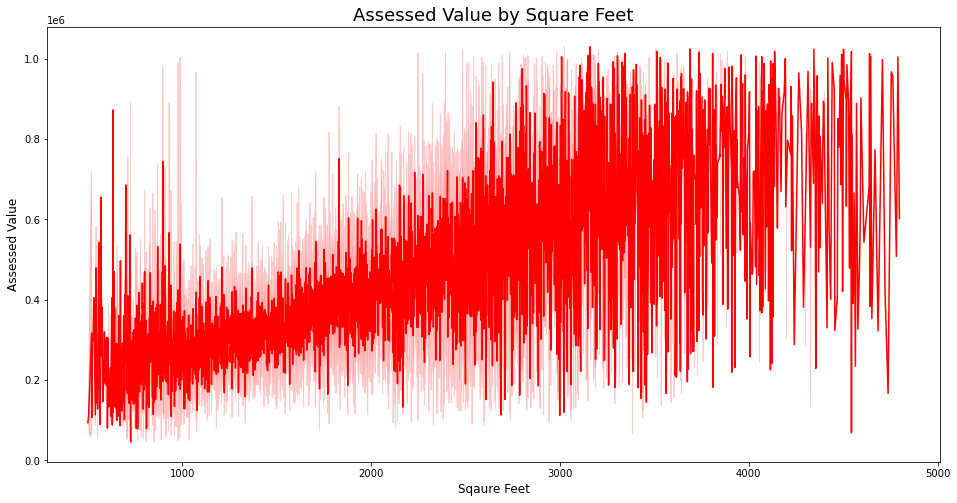

In [5]:
# Visualizing how square feet is correlated with assessed value
plt.figure(figsize = (16,8))
sns.lineplot(x = train.square_feet, y = train.assessed_value, color = 'red', data = train)
plt.xlabel('Sqaure Feet', fontsize = 12)
plt.ylabel('Assessed Value', fontsize = 12)
plt.title('Assessed Value by Square Feet', fontsize = 18)

## Answer 1:
**square_feet** has strong positive (0.45) correlation with **assessed_value**

***

## Question 2. Is `assessed_value` significantly different across 3 different counties?

In [16]:
fig = px.box(train, x="county", y="assessed_value", points="all", color = 'county', color_discrete_sequence=['#ff800e',"#006ba4",'#D4F6CC'])
fig.update_xaxes(categoryorder = 'mean ascending')
fig.show()

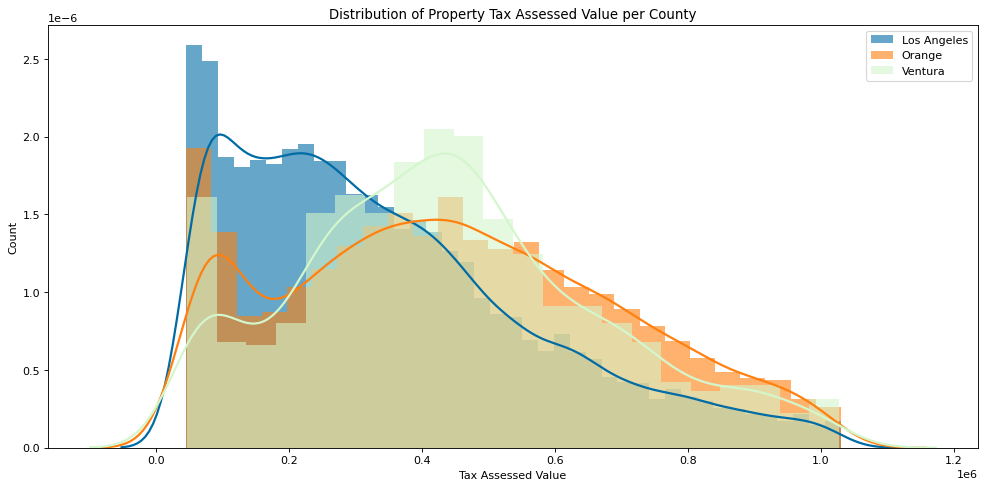

In [17]:
# Visualizing distribution of assessed_value per county

losangeles = train[train['county'] == 'Los Angeles'].assessed_value
orange = train[train['county'] == 'Orange'].assessed_value
ventura = train[train['county'] == 'Ventura'].assessed_value

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(losangeles, color="#006ba4", label="Los Angeles", **kwargs)
sns.distplot(orange, color="#ff800e", label="Orange", **kwargs)
sns.distplot(ventura, color="#D4F6CC", label="Ventura", **kwargs)
plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value per County')
plt.legend();

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are all equal.

$H_{a}$: Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal.

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [8]:
# Set alpha
alpha = 0.05

# Comparing mean of 3 independent samples
t, p = stats.f_oneway(losangeles, orange, ventura)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. 


***

## Question 3. Is having pool positively associated with `assessed value`?

In [19]:
# Visualizing the five-number summary of properties with pool and without pool

fig = px.box(train, x="has_pool", y="assessed_value", points="all", color = 'has_pool', color_discrete_sequence=['#ff800e','#006ba4'])
fig.show()

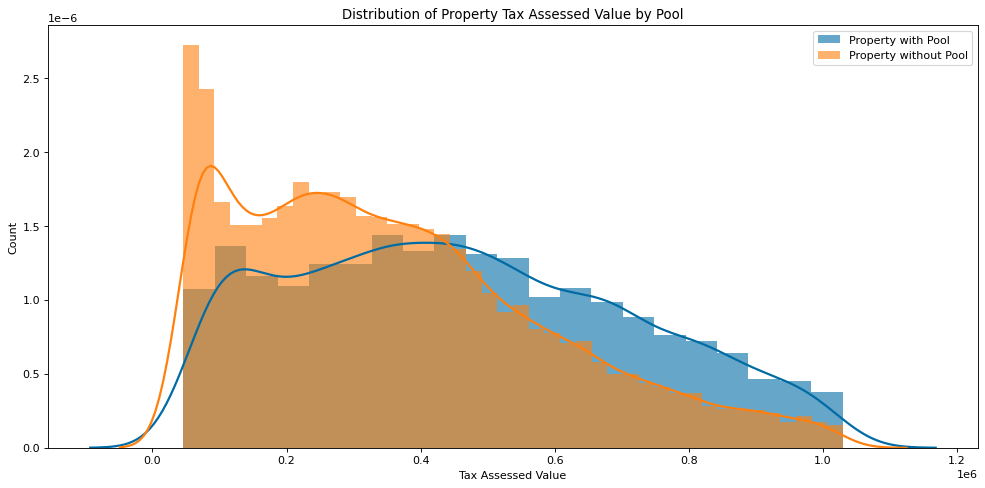

In [20]:
# Visualizing distribution of assessed_value for has_pool or not

pool = train[train['has_pool'] == 1].assessed_value
no_pool = train[train['has_pool'] == 0].assessed_value

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(pool, color="#006ba4", label="Property with Pool", **kwargs)
sns.distplot(no_pool, color="#ff800e", label="Property without Pool", **kwargs)

plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value by Pool')
plt.legend();

### Independent T-Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of property with pool <= Mean of property tax assessed value of property without pool.

$H_{a}$: Mean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool.

In [12]:
# Set alpha
alpha = 0.05

# Comparing mean of 2 independent samples
t, p = stats.ttest_ind(pool, no_pool, equal_var=False)

# Decide and draw conclusion
if p/2 < alpha:
    print("We reject H0.")
    print(Fore.BLUE+"\nMean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool. ")
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool. 


## Answer 3:
Proepeties with pool has a higher tax assessed value on average than properties without pool.

***

## Question 4. Is number of bedrooms and bathrooms associated with `assessed value`?

### 🛏️ Bedrooms 

In [21]:
# Visualizing the 5-number summary of property assessed value of different size of bedrooms

fig = px.box(train, x="bedrooms_size", y="assessed_value", points="all", color = 'bedrooms_size',  color_discrete_sequence=[ '#fec44f','#ffffd4','#993404'])
fig.update_xaxes(categoryorder = 'category descending')
fig.show()

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of small, medium, large bedrooms are all equal.

$H_{a}$: Mean of property tax assessed value of small, medium, large bedrooms are not all equal.

In [22]:
# Set alpha
alpha = 0.05

# Comparing mean of each sample and draw conclusion
smallbed = train[train['bedrooms_size']=='small'].assessed_value
mediumbed = train[train['bedrooms_size']=='medium'].assessed_value
largebed = train[train['bedrooms_size']=='large'].assessed_value

# Decide and draw conclusion
t, p = stats.f_oneway(smallbed, mediumbed, largebed)
if p < alpha:
    print("We reject H0. ")
    print(Fore.BLUE +"\nMean of property tax assessed value of small, medium, large bedrooms are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0. 

Mean of property tax assessed value of small, medium, large bedrooms are not all equal. 


### 🛁  Bathrooms 

In [23]:
# Visualizing the 5-number summary of property assessed value of different size of bathroom
fig = px.box(train, x="bathrooms_size", y="assessed_value", points="all", color = 'bathrooms_size', color_discrete_sequence=['#a9c2d5','#5d89af','#383f45'])
fig.update_xaxes(categoryorder = 'category descending')
fig.update_layout(title_text='Property Assessed Value per Bathrooms Size', title_x=0.5)
fig.show()

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of small, medium, large bathrooms are all equal.

$H_{a}$: Mean of property tax assessed value of small, medium, large bathrooms are not all equal.

In [24]:
# Set alpha
alpha = 0.05

# Comparing mean of independent sample
smallbath = train[train['bathrooms_size']=='small'].assessed_value
mediumbath = train[train['bathrooms_size']=='medium'].assessed_value
largebath = train[train['bathrooms_size']=='large'].assessed_value

# Decide and draw conclusion
t, p = stats.f_oneway(smallbath, mediumbath, largebath)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE+ "\nMean of property tax assessed value of small, medium, large bathrooms are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of small, medium, large bathrooms are not all equal. 


## Answer 4:

Property tax assessed value is dependent on the size of bedrooms and bathrooms.

***

<h1 align="center">------------ 🧪 Modeling ------------</h1>

## Scaling Data

In [4]:
# Copy a new dataframe to perform feature engineering
scaled_df = df.copy()

# Initiate MinMaxScaler
scaler = MinMaxScaler()

# Fit numerical features to scaler
scaler.fit(scaled_df[['square_feet', 'lot_size', 'age', 'bedrooms', 'bathrooms']])

# Set the features to transformed value
scaled_df[['square_feet', 'lot_size', 'age', 'bedrooms', 'bathrooms']] = scaler.transform(scaled_df[['square_feet', 'lot_size', 'age', 'bedrooms', 'bathrooms']])

# Split the scaled data into train, validate, test
s_train, s_validate, s_test = prepare.split(scaled_df)

# Split each dataset into X, y
cols = ['square_feet', 'lot_size', 'has_pool', 'age', 'county_Los Angeles', 'county_Orange', 'bedrooms', 'bathrooms']
X_train = s_train[cols]
y_train = s_train.assessed_value
X_validate = s_validate[cols]
y_validate = s_validate.assessed_value
X_test = s_test[cols]
y_test = s_test.assessed_value

## Baseline Prediction

In [5]:
train_predictions = pd.DataFrame({
    'actual': s_train.assessed_value
}) 
train_predictions['baseline'] = y_train.mean()
rmse = mean_squared_error(train_predictions.actual, train_predictions.baseline, squared = False)
print(Fore.BLUE+ "\nRoot mean of squared error of baseline prediction is: ", rmse)


Root mean of squared error of baseline prediction is:  237872.06885584313


## Multiple Regression + RFE

In [6]:
# Notes: I looped through k and found out the model performs the best when k=7
# Initiate the linear regression model
lm = LinearRegression()

# Transform our X
rfe = RFE(lm, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Use the transformed x in our model
X_train_rfe = rfe.transform(X_train)
X_validate_rfe = rfe.transform(X_validate)
X_test_rfe = rfe.transform(X_test)
lm.fit(X_train_rfe, y_train)

# Make predictions and add that to the train_predictions dataframe
train_predictions['multiple_rfe_k=7'] = lm.predict(X_train_rfe)

## Polynomial Features

In [7]:
# Notes: I looped through k and found out the model performs the best when degree(k)=3
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

# Generate polynomial features
poly.fit(X_train)

# Transform X_train
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=X_train.index,
)

# Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# Make predictions and add that to the train_predictions dataframe
train_predictions['polynomial degree 3'] = lm.predict(X_train_poly)

## Lasso-Lars

In [8]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data
lars.fit(X_train, y_train)

# predict validate
X_train_pred_lars = lars.predict(X_train)

# Add lassolars predictions to our predictions DataFrame
train_predictions['lasso_lars'] = X_train_pred_lars

## Generalized Linear Model

In [9]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data
glm.fit(X_train, y_train)

# predict train
X_train_predict_glm = glm.predict(X_train)

# Add lassolars predictions to our predictions DataFrame
train_predictions['glm'] = X_train_predict_glm

## Train Evaluation

In [10]:
def calculate_rmse(y_predicted):
    return mean_squared_error(train_predictions.actual, y_predicted, squared = False)

train_predictions.apply(calculate_rmse).sort_values()
print("TOP 3 MODELS:")
print(Fore.BLUE+"1. Polynomial degree=3 \n2. Lasso-Lars \n3. Multiple Regression + KFE K=7")

TOP 3 MODELS:
1. Polynomial degree=3 
2. Lasso-Lars 
3. Multiple Regression + KFE K=7


In [11]:
def calculate_rmse(y_predicted):
    return mean_squared_error(train_predictions.actual, y_predicted, squared = False)

train_predictions.apply(calculate_rmse).sort_values()

actual                      0.00
polynomial degree 3   200,429.35
multiple_rfe_k=7      207,896.69
lasso_lars            207,897.50
glm                   208,244.28
baseline              237,872.07
dtype: float64

## Top 3 Models Validate Evaluation

In [12]:
validate_predictions = pd.DataFrame({
    'actual': s_validate.assessed_value
}) 
validate_predictions['baseline'] = y_validate.mean()
# Transform validate dataset with poly features, and put predictions into validate dataframe
X_validate_poly = poly.transform(X_validate)
validate_predictions['Polynomial Degree=3'] = lm.predict(X_validate_poly)

# Using lasso lars to make prediction and put in our validate dataframe
X_validate_pred_lars = lars.predict(X_validate)
validate_predictions['Lasso-Lars'] = X_validate_pred_lars

# Using multiple regression model and put prediction in our validate dataframe
X_validate_rfe = rfe.transform(X_validate)
validate_predictions['Multiple Regression + KFE K=7'] = lm.predict(X_validate_poly)

# Evaluate performace using RMSE
def calculate_rmse(y_predicted):
    return mean_squared_error(validate_predictions.actual, y_predicted, squared = False)

validate_predictions.apply(calculate_rmse).sort_values()

actual                                0.00
Polynomial Degree=3             199,529.27
Multiple Regression + KFE K=7   199,529.27
Lasso-Lars                      205,508.69
baseline                        235,949.69
dtype: float64

## Top 1 Model Test Evaluation

In [13]:
test_predictions = pd.DataFrame({
    'actual': s_test.assessed_value
})
test_predictions['baseline'] = y_test.mean()
X_test_poly = poly.transform(X_test)
test_predictions['Polynomial Degree=3'] = lm.predict(X_test_poly)
X_test_rfe = rfe.transform(X_test)
test_predictions['Multiple Regression + KFE K=7'] = lm.predict(X_test_poly)
rmse = mean_squared_error(test_predictions.actual, test_predictions['Polynomial Degree=3'], squared = False)
print(Fore.BLUE+"Polynomial degree=3 RMSE on test: ", rmse)

Polynomial degree=3 RMSE on test:  202015.79999545988


# 🔆 Conclusion